# Explore Healthcare vs Economy

This notebook analyzes the relationship between **GDP per capita**, **healthcare expenditure**, and **health outcomes** across countries using basic Python code.

We are working with World Bank data including:  
- GDP per capita  
- Health expenditure (% of GDP)  
- Life expectancy  
- Infant mortality  
- Population

We perform the following steps:
1. Load and inspect the dataset.
2. Handle missing values and extract relevant indicators.
3. Compute basic statistics, like average GDP per capita.
4. Visualize GDP per capita distribution.
5. Explore the relationship between GDP and life expectancy.
6. Save a simplified dataset for future analysis.
7. Plot a **histogram of GDP per capita**.
8. Perform a **correlation analysis** between GDP, Life Expectancy, and Health Expenditure.
9. Explore relationships between healthcare expenditure and life expectancy.

**Instructions:**
- Ensure the CSV file is in the `data/` folder (`worldbank_healthcare_data.csv`).
- Run cells sequentially to follow the analysis step by step.
- Use the exported simplified dataset for further plots or calculations.

In [58]:
# --- Import necessary libraries ---
import matplotlib.pyplot as plt
import os
import csv

# --- Set the path to the CSV file ---
# Note: This path is relative to the notebook's location.
file_path = '../data/worldbank_healthcare_data.csv'

# --- Read the CSV file line by line ---
with open(file_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# --- Remove the header row and split the data into a list of lists ---
header = lines[0].strip().split(',')
data = [line.strip().split(',') for line in lines[1:]]

# --- Check the first 5 rows to ensure the file loaded correctly ---
print("Header:", header)
print("First 5 rows:")
for row in data[:5]:
    print(row)

Header: ['', '', 'gdp_per_capita', 'health_exp_gdp', 'life_expectancy', 'infant_mortality', 'population']
First 5 rows:
['AFE', '2015', '1479.61525980543', '5.9713905922151', '61.713030523495', '49.010304526817', '607123269.0']
['AFE', '2016', '1329.80728479234', '6.06778640864792', '62.1679813169199', '47.7739196418728', '623369401.0']
['AFE', '2017', '1520.21223076132', '5.929017140206', '62.5912750961501', '46.7832639603647', '640058741.0']
['AFE', '2018', '1538.90167917284', '5.789154817055', '63.3306913582336', '43.8518142030077', '657801085.0']
['AFE', '2019', '1493.81793829992', '5.81267571889709', '63.8572612837042', '42.1900739123661', '675950189.0']


In [59]:
# --- Count rows with missing data ---
missing_rows = 0
for row in data:
    if '' in row:  # If any column is empty
        missing_rows += 1
print("Rows with missing data:", missing_rows)

# --- Extract GDP per capita values from column index 2 ---
gdp_values = []
for row in data:
    try:
        gdp = float(row[2])  # Convert string to float
        gdp_values.append(gdp)
    except:
        pass  # Skip rows where conversion fails

# --- Compute the average GDP per capita ---
average_gdp = sum(gdp_values) / len(gdp_values)
print("Average GDP per capita:", average_gdp)

Rows with missing data: 1016
Average GDP per capita: 17579.61431089643


## Observations
- Number of rows with missing data: 1,016
- Average GDP per capita: 17,579.61 USD

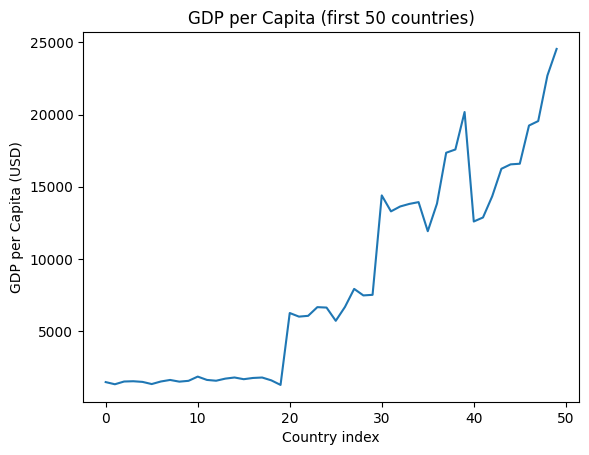

In [60]:
# --- Basic line plot of GDP per capita for the first 50 countries ---
plt.plot(gdp_values[:50])
plt.title("GDP per Capita (first 50 countries)")
plt.xlabel("Country index")
plt.ylabel("GDP per Capita (USD)")
plt.show()

## Insights
- The first 50 countries show GDP variation.
- Extreme values (very high or low GDP) may need special attention.

Number of valid GDP values: 2309
Number of valid Life Expectancy values: 2309


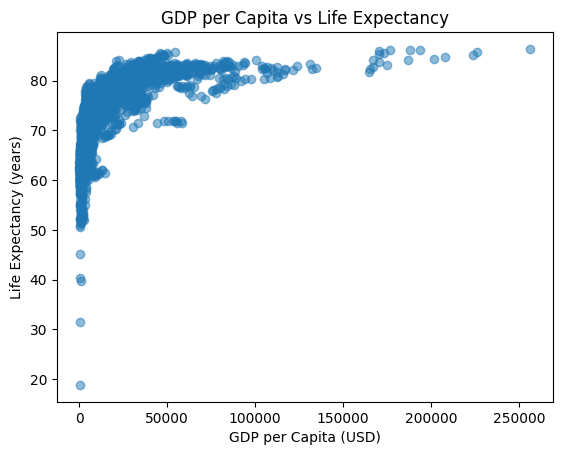

In [61]:
# --- Extract GDP and Life Expectancy values, skipping missing/invalid rows ---
life_expectancy = []
clean_gdp = []

for row in data:
    try:
        gdp = float(row[2])
        life = float(row[4])
        clean_gdp.append(gdp)
        life_expectancy.append(life)
    except:
        pass  # Skip rows with invalid data

# --- Ensure both lists have the same length ---
print("Number of valid GDP values:", len(clean_gdp))
print("Number of valid Life Expectancy values:", len(life_expectancy))

# --- Create a scatter plot ---
plt.scatter(clean_gdp, life_expectancy, alpha=0.5)
plt.title("GDP per Capita vs Life Expectancy")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Life Expectancy (years)")
plt.show()

## Insights
- Scatter plot shows a positive correlation between GDP and Life Expectancy.
- Countries with higher GDP generally have higher life expectancy.

In [62]:
# --- Save only GDP and Life Expectancy columns for further analysis ---
export_file_path = '../data/gdp_life_expectancy.csv'

with open(export_file_path, 'w', encoding='utf-8') as f:
    f.write('gdp_per_capita,life_expectancy\n')  # Write header
    for gdp, life in zip(clean_gdp, life_expectancy):
        f.write(f"{gdp},{life}\n")

print("Simplified dataset saved to:", export_file_path)

Simplified dataset saved to: ../data/gdp_life_expectancy.csv


In [63]:
# --- Initialize counters ---
above_average = 0
below_average = 0

# --- Count countries above and below the average GDP ---
for row in data:
    try:
        gdp = float(row[2])
        if gdp > average_gdp:
            above_average += 1
        else:
            below_average += 1
    except:
        pass  # Skip rows with invalid GDP

print("Countries with GDP above average:", above_average)
print("Countries with GDP below average:", below_average)

# --- Find highest and lowest GDP values ---
max_gdp = max(gdp_values)
min_gdp = min(gdp_values)
print("Highest GDP per capita:", max_gdp)
print("Lowest GDP per capita:", min_gdp)

# --- Identify countries with these values ---
country_high = ""
country_low = ""
for row in data:
    try:
        gdp = float(row[2])
        if gdp == max_gdp:
            country_high = row[0]
        elif gdp == min_gdp:
            country_low = row[0]
    except:
        pass

print("Country with highest GDP per capita:", country_high)
print("Country with lowest GDP per capita:", country_low)

Countries with GDP above average: 744
Countries with GDP below average: 1796
Highest GDP per capita: 256580.515122745
Lowest GDP per capita: 153.930217854023
Country with highest GDP per capita: MCO
Country with lowest GDP per capita: BDI


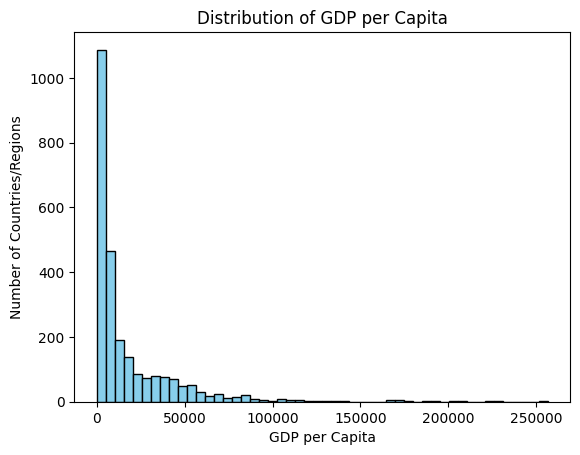

In [64]:
# --- Plot a histogram of GDP per capita ---
plt.hist(gdp_values, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of GDP per Capita")
plt.xlabel("GDP per Capita")
plt.ylabel("Number of Countries/Regions")
plt.show()

## GDP per Capita Distribution

We create a histogram to visualize the **distribution of GDP per capita** across countries.  

- Helps identify countries with very low or very high GDP.
- Shows the frequency of countries within GDP ranges.

In [65]:
# --- Extract Life Expectancy and Health Expenditure ---
life_expectancy = []
health_exp = []

for row in data:
    try:
        life_expectancy.append(float(row[4]))  # Column 4: Life Expectancy
        health_exp.append(float(row[3]))       # Column 3: Health Expenditure (% of GDP)
    except:
        pass  # Skip rows with missing or invalid values

# --- Compute simple correlations manually ---
import numpy as np

# Ensure lists are the same length
min_len = min(len(gdp_values), len(life_expectancy), len(health_exp))
gdp_arr = np.array(gdp_values[:min_len])
life_arr = np.array(life_expectancy[:min_len])
health_arr = np.array(health_exp[:min_len])

# Compute Pearson correlation
corr_gdp_life = np.corrcoef(gdp_arr, life_arr)[0, 1]
corr_gdp_health = np.corrcoef(gdp_arr, health_arr)[0, 1]
corr_life_health = np.corrcoef(life_arr, health_arr)[0, 1]

print(f"Correlation GDP vs Life Expectancy: {corr_gdp_life:.3f}")
print(f"Correlation GDP vs Health Expenditure: {corr_gdp_health:.3f}")
print(f"Correlation Life Expectancy vs Health Expenditure: {corr_life_health:.3f}")

Correlation GDP vs Life Expectancy: 0.009
Correlation GDP vs Health Expenditure: 0.025
Correlation Life Expectancy vs Health Expenditure: 0.006


## Correlation Analysis

We compute the **Pearson correlation coefficients** between:

1. GDP per capita and Life Expectancy
2. GDP per capita and Health Expenditure
3. Life Expectancy and Health Expenditure

This provides insight into how economic factors relate to health outcomes globally.

In [66]:
# Extract Healthcare Expenditure vs Life Expectancy

# Create empty lists for healthcare spending and life expectancy
health_exp = []
life_expectancy_values = []

# Loop through data, skip rows with missing or invalid values
for row in data:
    try:
        exp = float(row[3])            # health_exp_gdp column
        life = float(row[4])           # life_expectancy column
        health_exp.append(exp)
        life_expectancy_values.append(life)
    except:
        pass

# Check that both lists have the same length
print("Number of valid entries:", len(health_exp), len(life_expectancy_values))

Number of valid entries: 2173 2173


## Healthcare Expenditure vs Life Expectancy

In this cell, we extract healthcare spending (`health_exp_gdp`) and life expectancy (`life_expectancy`) from the dataset.  
- We skip rows with missing or invalid data.  
- We check that both lists have the same length to ensure a valid scatter plot can be created.

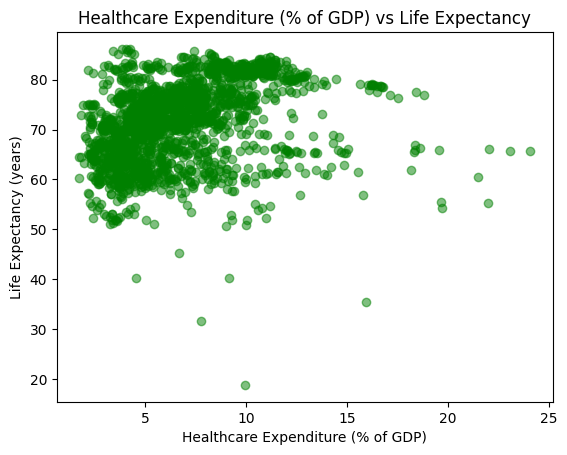

In [67]:
# Scatter plot of Healthcare Expenditure vs Life Expectancy

plt.scatter(health_exp, life_expectancy_values, alpha=0.5, color='green')
plt.title("Healthcare Expenditure (% of GDP) vs Life Expectancy")
plt.xlabel("Healthcare Expenditure (% of GDP)")
plt.ylabel("Life Expectancy (years)")
plt.show()

## Scatter Plot of Healthcare Spending vs Life Expectancy

This plot visualizes the relationship between healthcare spending and life expectancy.  
- Each point represents a country-year entry.  
- Alpha is set to 0.5 for better visibility of overlapping points.  

Observing the scatter plot helps us identify general trends and potential outliers.

In [68]:
# Compute basic statistics for healthcare expenditure

avg_health_exp = sum(health_exp) / len(health_exp)
max_health_exp = max(health_exp)
min_health_exp = min(health_exp)

print("Average healthcare expenditure (% GDP):", avg_health_exp)
print("Highest healthcare expenditure (% GDP):", max_health_exp)
print("Lowest healthcare expenditure (% GDP):", min_health_exp)

Average healthcare expenditure (% GDP): 6.624061582589511
Highest healthcare expenditure (% GDP): 24.07940674
Lowest healthcare expenditure (% GDP): 1.7540164


## Basic Statistics for Healthcare Expenditure

We compute:  
- Average healthcare spending across all countries  
- Maximum and minimum healthcare spending  

These statistics provide a summary of global healthcare investment levels and help identify extreme values.